In [86]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [87]:
### CREATE VIRTUAL DISPLAY ###
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients to use our virtual DISPLAY :1.0.

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


In [88]:
#loading the data from csv file using pandas
customer_data=pd.read_csv('Mall_Customers.csv')

In [89]:
#printing first five rows
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [90]:
#finding the no.of rows and columns
customer_data.shape

(200, 5)

In [91]:
#200 rows 5 columns(features)
#getting some information about the dataset
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [92]:
#checking for missing values 
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [93]:
#choosing which columns to choose for clustering.here we chose annual income and spending score column
x=customer_data.iloc[:,[3,4]].values

In [94]:
print(x)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [95]:
#choosing the no.of clusters using WCSS-within cluster sum of squares
#finding wcss value for different no.of clusters
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

C:\Users\dnhac\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


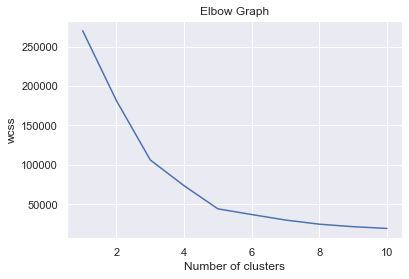

In [96]:
#plotting elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title('Elbow Graph')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [97]:
'''Taking clusters=5
Traing the k-means clustering model'''
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=0)

# return a label for each data point based on their cluster
y=kmeans.fit_predict(x)
print(y)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


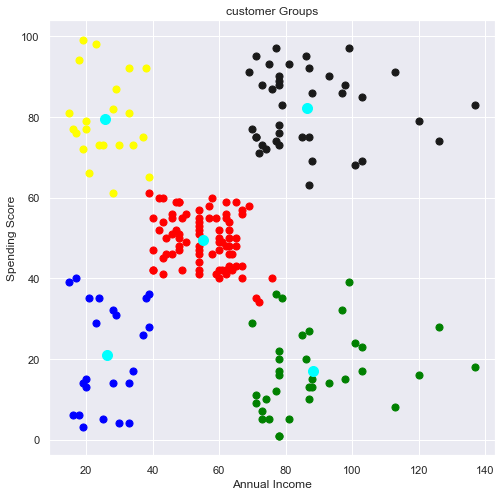

In [98]:
#visualizing the cluster
#plotting all the clusters and their centroids
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0],x[y==0,1],s=50,c='green',label='Cluster 1')
plt.scatter(x[y==1,0],x[y==1,1],s=50,c='red',label='Cluster 2')
plt.scatter(x[y==2,0],x[y==2,1],s=50,c='k',label='Cluster 3')
plt.scatter(x[y==3,0],x[y==3,1],s=50,c='yellow',label='Cluster 4')
plt.scatter(x[y==4,0],x[y==4,1],s=50,c='blue',label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centroids')
plt.title('customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [99]:
kmeans.predict([[15,39]])
#there for 5th cluster as it gave array([4])

array([4])

In [100]:
#saving the Model
import joblib
joblib.dump(kmeans,"customer_segmentation")
model=joblib.load("customer_segmentation")
model.predict([[15,39]])

array([4])

In [101]:
#Creating GUI
from tkinter import *
import joblib

In [102]:
import tkinter as tk

In [103]:
def show_entry_fields():
    p1=int(e1.get())
    p2=int(e2.get())
    
    model = joblib.load('customer_segmentation')
    result=model.predict([[p1,p2]])
    print("This Customer belongs to cluster no: ", result[0])
    
    if result[0] == 0:
        Label(master, text="Customers with medium annual income and medium annual spend").grid(row=31)
    elif result[0]==1:
        Label(master, text="Customers with high annual income but low annual spend").grid(row=31)
    elif result[0]==2:
        Label(master, text="Customers with low annual income and low annual spend").grid(row=31)
    elif result[0]==3:
        Label(master, text="Customers low annual income but high annual spend").grid(row=31)
    elif result[0]==4:
        Label(master, text="Customers with high annual income and high annual spend").grid(row=31)

master=Tk()
master.title("Customer Segmentation Using Machine Learning")


label = Label(master, text = "Customer Segmentation Using Machine Learning"
                          , bg = "black", fg = "white"). \
                               grid(row=0,columnspan=2)

Label(master,text="Annual Income").grid(row=1)
Label(master, text="Spending Score").grid(row=2)


e1 = Entry(master)
e2 = Entry(master)

e1.grid(row=1, column=1)
e2.grid(row=2, column=1)

Button(master, text='Predict', command=show_entry_fields).grid()

master.mainloop()

This Customer belongs to cluster no:  0
